# Word representation and clustering

## Plan :

__I. Word representation methods__
1. Document-term matrix (DTM)
2. Term Frequency Inverse Document Frequecy (TFIDF)
3. Word2vec
4. Bidirectional Encoder Representations from Transformers (BERT)

__II. Clustering methods__:
1. Kmeans
2. Latent Dirichlet Allocation
3. DBSCAN

__III. Application : Topic recognition__
1. Word representation methods in use
2. Clustering algorithms in use 
3. Which method is the best for topic recognition?

### Abstract

Natural language processing is the technology used to aid computers to understand the human's language. Computational linguists do it by trying to find the meaning of words, the idea behind it.
In natural language processing, words are represented as vectors of real numbers. The computation of these values is usually expensive but this representation allows the definition of mathematical concepts, distances for instance that can be used to find possible connections between words. 
However, the nature of the connection cannot be grasped by a scalar as it can have different shapes : synonyms, antonyms etc.
Consequently, word representation methods are expected to resolve the computation and word-sense disambiguation issues.

## I. Word representation methods

### 1. Document-term matrix (DTM)

The first word representation method we use is the document-term matrix. This method first turns each document into a vector by counting how many times each word appear in the document, in other words, its frequency. This transformation is what we call a bag-of-word model because the order of the words does not matter in this representation. Then, this method produces a matrix $M$ with each $M_{i,j}$ describing the frequency of the j-th term in the i-th document. 
This representation allows some comparison between documents based on the dot product. Let V be the number of unique words in the corpus, $a_i$ and $b_i$ the i-th word's frequency for two distinct documents. Computing $\sum_{i=1}^{T} a_ib_i$  gives the similarity between the two documents. The higher the result is, the more similar the two documents are. 
There are however major flaws with this method :
- First, the dot product only counts the occurences of the exact same words. If we computed the dot product of the words "cat" and "cats" for example, we would get a 0, as if there were no relationship between these words.
- Second, most common words which are usually prepositions, weigh more than rarer words like nouns even though in indo-european languages, such words carry less meaning.
- Finally, for a vocabular of size V and a number of documents N, the worst case time complexity of the algorithm is $O$(__VN__), which is a quadratic time. However, in practice the terms will not be present in all the documents.

### 2. Term Frequency - Inverse document Frequency (TF-IDF)

 TF-IDF representation is another statistical approach that can correct some of the issues mentionned above. This method simply divides the term frequency in a document by the frequency of the term for all the documents. This way, each word is inversely proportional to the number of documents it appears in. Not only it normalizes the words weights but it also highlights rare words.
In sum, TF-IDF is a way to give better weights to words according to their relevance. 

These methods discussed above are what we call localist methods. They characterize documents on one unit causing the "meaning of the words is stored in only one place" [1]. The inferences we can make are at document level but for a better analysis we need a numerical representation for each word. Such methods exists and they are called word embeddings methods.

### 3. Word2vec

The third method we will study is a word embedding method called word2vec. It works with the combination of two algorithms.

#### Skip-gram

There is a general idea that you can get the meaning of a word by looking at its context. Based on this principle, the Skip-gram model aims to predict the context words around a center word.

#### Skip-gram in details

For a center word $w_t$ the model defines the unique probability of a word appearing in its context within a certain window. It is a probability distribution. The window size is controlled by a parameter $m$ which works like a radius because the window size is for both sides of the center word. We would like to have the words which have the highest chances of appearing in the context of $w_t$ so we have to choose the word vector that maximize this probability distribution. The parameter of the model that we call $\theta$ is exactly this words's vector. 
In order to find the best parameters $\theta$ we use what we call a loss function $J = 1 - P(w_{-t}|w_t)$ with $w_{-t}$ being the words around $w_t$ which ables us to adjust the parameters $\theta$ and find that maximum. It is done by minimizing the derivative of the loss function, which can be written as follows : $$J'(\theta)=\prod_{t=1}^{T} \prod_{-m\leq j \leq m; j\neq 0}\operatorname{P}(w_{t+j}|w_t;\theta) $$
Then, we can use the log likelihood which facilitate the computation by changing products into sums without changing  the maximum that we will find.
$$ J(\theta) = -\frac{1}{T} \sum_{t=1}^{T} log\operatorname{P}(w_{t+j}|w_t;\theta) $$
The $\frac{1}{T}$ is used to "normalize" the result in order for it to stay in a valid range.
Before doing that, since word vectors are not probabilities we have to transform them. The simplest way to get a probability distribution is by using the function $\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$. It is efficient because it will make any value positive and in the [0,1] range.
Each word in this model have two representation, one as a context word and another as a center word because it is much easier for the optimization process rather than when vectors are tied to each other. 
As such, if we define $V_c$ the vector of the center word of indice c and $u_o$ the context word of indice o, we would formally use the softmax function as follows : $$ \operatorname{P}(o|c) = \frac{\exp(u_o^{T}V_c)}{\sum_{w=1}^W \exp(u_w^{T})V_c} $$
To sum up, if we reorder this process in the right order for a vocabulary of size V and vectors of dimension d, we first multiply the center word $w_t$ which is a one hot vector with the matrix $W$, representing the center words. This multiplication selects the column of the matrix which corresponds to $w_t$, we call it $V_c$. Then, we compute the dot product of $V_c$ with each context word representation $u_o$ stored in a matrix $O$. We feed the result $u_o^{T}V_c$ to the softmax function to turn it into a probability $ \operatorname{P}(o|c) = \text{Softmax}(u_o^{T}V_c)$. This gives us the probability for each word of appearing in the context of $w_t$. 
Finally, we have a truth vector that is a one hot vector showing which word should have the highest probability.  We use it to optimize the parameters by minimizing this loss i.e we find the best vector $\theta$ with the gradient descent.

#### Continuous Bag Of Words (CBOW)

The second algorithm is the continuous bag of word.
CBOW does the complementary work, it predicts the target word from the context words.


#### CBOW in details 

Each word is encoded as a one hot vector, with a dimension of the size of the vocabulary. For a window size m, we try to predict the center word by using the m-1 words surrounding it. It is done with a neural network that takes the context words as input and tries to predict the center word. Then, we feed it to a training function to get a probability that is compared to the truth vector. We use the error to update the weights of the vector with the same process.

Overall, the Word2vec model aims to be a scalable and fast word embedding model that can be run over billions of words and produce good word representation with usually a dimension of 300. It is very different and even opposed to the first methods as it is a distributional based representation method.

### 4. Bidirectional Encoder Representations from Transformers (BERT)

BERT is a Google open source state-of-the-art language understanding model. It was released in 2018. It a general pre-trained model that can be finely tuned to various tasks easily.
Breaking down the model bit by bit would be very complicated to understand as it involves a certain number of concepts such as recurrent neural networks (RNN), Long Short-Term Memory (LSTM), Encoder-Decoder, Attention,  Transformers etc. That high complexity is due to the fact that it is  build on top of these technologies and that it competes against other models on all NLP tasks. There are other models that are specialized in some tasks like text classification for example but as a general model BERT aims to be used for all purposes. As such, we will focus only on its word representation method like previous algorithms.

<img src="BERT_Mountain.png" width="400" height="800"/>

#### Word embedding in BERT 

First of all, as a pre-trained model, BERT is build on a fixed size vocabulary of 30k words. Like word2vec, words are represented as vectors of real values but the size of the vector is 768 instead of 300. The string version of the words are mapped with an id in a dictionary allowing the model to retrieve its word vector in the word embedding table with its id. 
If the word is not matched in the dictionary, BERT will handle it by breaking the word into smaller pieces with a word piece model. This model finds smaller bits of words known to BERT and matches them in the dictionary. If not the subword does not exist in the vocabulary, it can be broken to single character. The subwords and letters are not combined after but they are treated as distinct words.

This particularity of BERT means that it can handle any word, even the ones new to it or the ones that does not exist.
We can also notice that the pre-processing is done automatically on BERT, there is no need to clean the text as we had to for other models. 

Secondly, words are also represented differently in BERT because it creates a representation for each context. Word vectors will be different according to the context. We can say that BERT is a context-informed word embedding, allowing it to be more accurate for sense disambiguation. 

## II. Clustering methods

### 1. K-means

Clustering is an exploratory data analysis technique used to identify clusters in a database. Our goal when we perform a clustering algorithm is to find subgroups in the data. The data points in the same subgroup have to be very similar. On the other hand, the data points in different subgroups have to be very different. Put another way, our goal is to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as the euclidean distance. The decision of which similarity measure to use depend on the domain.

Clustering analysis can be done based on featurmes where we try to find subgroups of samples based on features or based on samples where we try to find subgroups of features based on samples. We will cover here clustering based on features. 
Unlike supervised learning, clustering is considered an unsupervised learning method since we do not have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to find, if possible, a particular structure in our database.
In this paragraph, we will talk about Kmeans : one of the most used clustering algorithm due to its simplicity.

#### How does K-means works?

#### Similarity Measure - Euclidean distance 
When we perform k-means in order to see if data points are similar, we need a similarity measure. There are various similarity measures according to the domain. Most commonly, we use the euclidean distance.
Let denote by $X$ and $Z$ to sample pattern vectors, $X={\left({x}_{1},{x}_{2},...,{x}_{n}\right)}^{T}$ and $Z={\left({z}_{1},{z}_{2},...,{z}_{n}\right)}^{T}$. We define the distance between $X$ and $Z$ as:
$$d=||X-Z||= {\left(\sum_{i=1}^{n}  {\left({x}_{i}-{z}_{i}\right)}^{2}\right)}^{1/2}$$
$D$ is the distance between $X$ and $Z$ in a n dimensional space. 

#### Inertia
Let denote by $ E= \left({x}_{1},{x}_{2},...,{x}_{n}\right) \subset \mathbb{R}^{n}$. For each $x{}_{i} \in E $ ze associate a weight ${m}_{{x}_{i}} > 0$.
For everey subset $A$ of $E$ we define the weight:
$${m}_{A} = \sum_{x \in A} {m}_{x}$$
The gravity center of A is:
$${g}_{A}=\frac{ \sum_{x \in A} {m}_{x} \times x}{{m}_{A}}$$

The inertia of $E$ define by:
$$I\left(E\right)=\sum_{x \in E} {m}_{x} \times {d}^{2}\left(x,{g}_{E}\right)$$
Let define by $P = {{A}_{1},{A}_{2},...,}{A}_{q}$ a partition of $E$. For each subset ${A}_{i}$, we consider ${g}_{{A}_{i}}$ its gravity center,${I\left({A}_{i}\right)}$ and ${m}_{{A}_{i}}$ his weight.

#### Within cluster sum of squares
The within-cluster sum of squares is a quantity that measures the variability of the observations within each cluster. A small within-cluster sum of squares means that the data points within the cluster are similar and a large within-cluster sum of squares means that observations within the cluster are fareaway from each other.
The within cluster sum of squares is influenced by the number of observations. As the number of observations increases, the sum of squares becomes larger.
We consider ${I}_{W}$ the within-cluster sum of squares.
$${I}_{W}= \sum_{i}{}I\left({A}_{i}\right)$$

#### Within cluster sum of squares
The within-cluster sum of squares is a quantity that measures the variability of the observations within each cluster. A small within-cluster sum of squares means that the data points within the cluster are similar and a large within-cluster sum of squares means that observations within the cluster are fareaway from each other.
The within cluster sum of squares is influenced by the number of observations. As the number of observations increases, the sum of squares becomes larger.
We consider ${I}_{W}$ the within-cluster sum of squares.
$${I}_{W}= \sum_{i}{}I\left({A}_{i}\right)$$

#### Huygens theorem
$$Total \space Sum \space Squares = Between \space Cluesters \space Sum \space Squares + Within \space Cluesters \space Sum \space Squares$$



#### The algorithm

The first step of k-means is to find the $K$ initial centroids, where $K$ is the number of clusters we want to obtain. Each point is then assigned to the closest centroid. Thus we have K collections of points call clusters. The next step is to recalculate the centroids of each cluster by taking into account the new data points added. We repeat the assignment and centroids calculation until the centroids remain the same. It can be written as follows : 

0. Initialize cluster centers $\mu_j$
1. Assign an observation to the cluster center : $z_i \leftarrow arg \underset{j}{min} ||\mu_j - x_i ||² $ 
2. Revise cluster centers : $\mu_j = \frac{1}{n_j} \underset{i:z_i=j}\sum x_i $

When we perform k-means, we want observations within the same cluster to be very similar. Formally that means that we want to minimize the within-cluster sum of squares. As the total sum square is a constant value, by considering the Huygens theorem, we can also define the K-means algorithm as the problem of maximization of the between clusters sum of squares. 

#### Choosing K

Like every unsupervised machine learning algorithm we have not the ground truth to evaluate the model’s performance. We don't have a reliable evaluation metric that allow as to analysze he outpout of our K-means. k-means algorithm require as inpput the the number K of cluster we want to obatain. Their is no right answer for K. Most of the time we run the algorithm with different K. For each value of K we can observerd the spread out of he clusters by using Principal conponent analysis to observed our data points in a two dimensinnal space.below we present some empirical criteria that can help us to make the choice of K

##### Elbow Method

Elbow method is an empiric criterium which help us to choose a number of cluster K. for each K, we calculate the sum of squared distance (SSE) between data points and their assigned clusters's centroids and then we plot the SSE We pick k at the spot where SSE starts to flatten out and to form an elbow as you can see on the chart below.

Text(0, 0.5, 'Sum of squared distance')

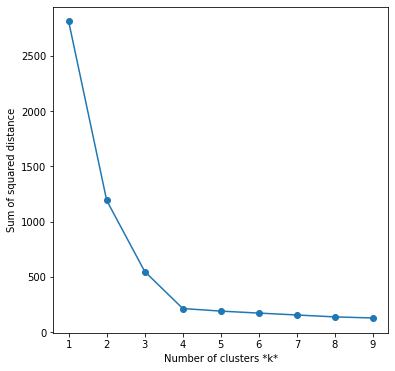

In [6]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
sse = []
X, y = sklearn.datasets.make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

##### Silhouette Analysis

The silhouette measurement helps us to select the optimal number of clusters. It's helps us to determine the degree of separaions  betwenn clusters.

For each sample:

calculate the average distance from all data points in the same cluster ${a}_{i}$

Calculate the average distance from all data points in the closest cluster ${b}_{i}$

calculate the coefficient:
$${s}_{i}= \frac{{a}_{i} - {b}_{i}} {max\left({a}_{i} - {b}_{i}\right)} \space, \space {s}_{i} \in [\![-1;1]\!] $$
${s}_{i}= 0$ means that the sample is very close to the neighboring clusters

${s}_{i}= 1$ means that the sample is far away from the neighboring clusters

${s}_{i}= -1$ meas that the sample is assigned to the wrong clusters

on the graphic representations below you can observe the different values of ${s}_{i}$ when you execute the kmeans on the data points.

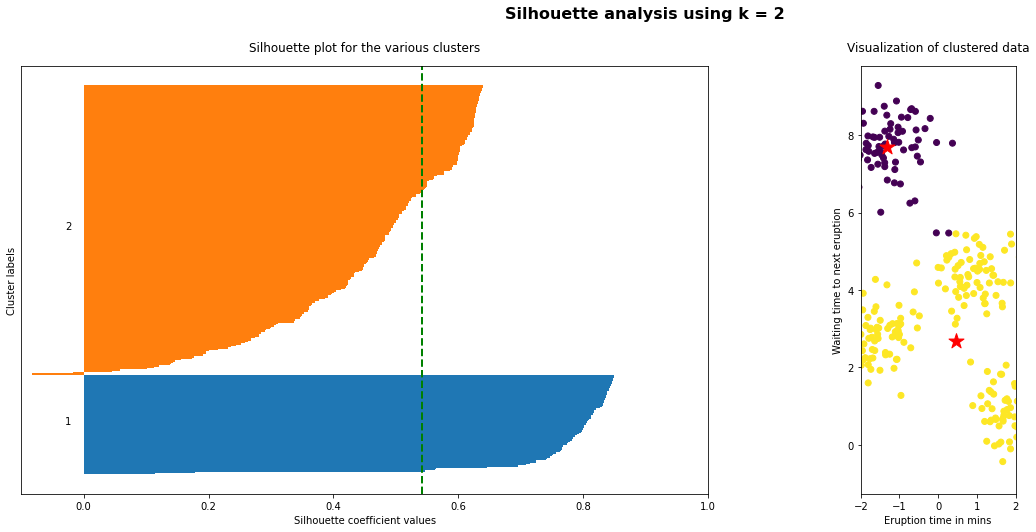

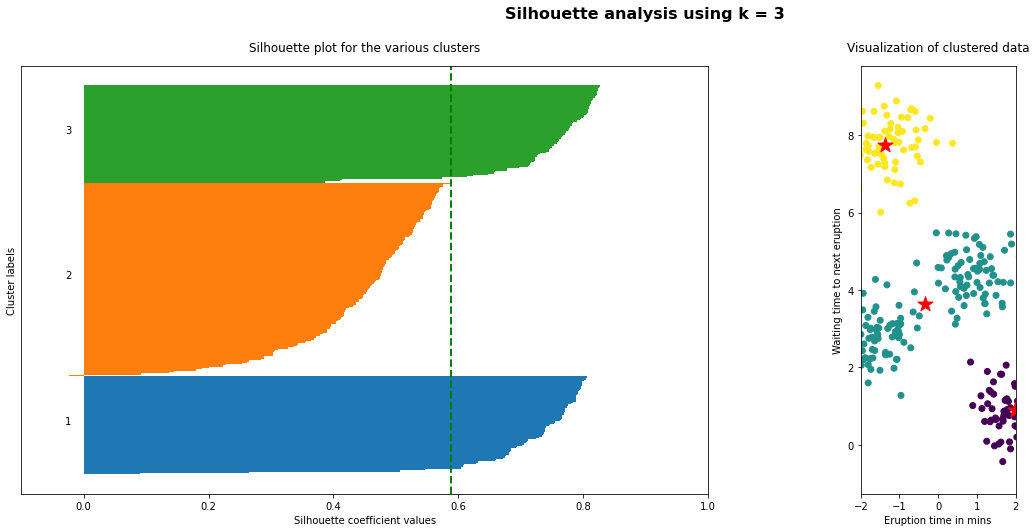

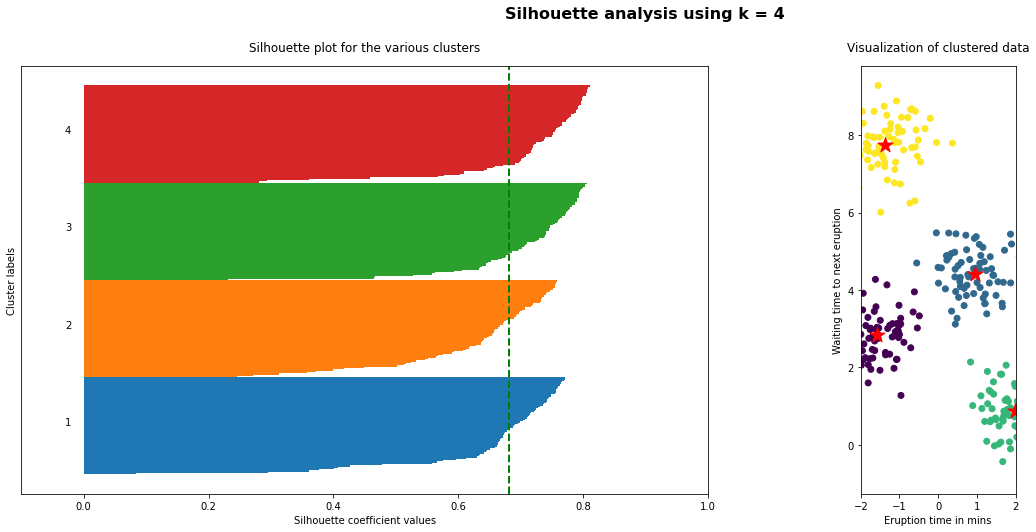

In [8]:
import numpy as np
X_std= X
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = sklearn.metrics.silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)

We want ${s}_{i}$ to be as close as possible to 1. So with the graphic above we have the greatest ${s}_{i}$ for K=4

####   $R-squares$ measure $\left({R}^{2}\right)$
It is common to calculate the ratio of Between Clusters Sum of Squares and total Sum of Squares to judge the quality of the k-means outpout. We denote this ratio by ${R}^{2}$. 

$${R}^{2} = \frac{Between \space Clusters \space Sum \space Squares} {Total \space Sum \space Squares }$$
We want the ${R}^{2}$ to be close to 1 as much as possible. As elbow method; we compute the ${R}^{2}$ for different value of K number of clusters and we make a plot with the computed ${R}^{2}$ values as below.

#### Drawbacks

K-means works very well when it comes to capturing the structure of the data if clusters have a spherical shape but does an abysmal job when the clusters have complicated geometric shapes. The number K of clusters is an input for the K-means algorithm, but there is not a reliable evaluation metric.  Different initial centroids give us different final clusters. K-means does not guarantee to find the global optimum solution for clustering. The algorithm can be susceptible to outliers and noisy data: the quality of the final clustering can be highly dependent on the position of the initial cluster centroids. In other words, k-means will regularly discover a local rather than the global minimum.

### 2. Latent Dirichlet Allocation

In this paragraph, we describe the basic ideas behind the latent Dirichlet allocation (LDA), which is the most straightforward topic model. The intuition behind LDA is that documents exhibit multiple topics. We formally define a topic to be a distribution over a fixed vocabulary.

#### Theoretical preliminary to the model

The random variables ${X}_{1},...,{X}_{n}$ are exchangeable if the n! permutations $\left({X}_{{k}_{1}},...,{X}_{{k}_{n}}\right)$ have the same n-dimensionnal probability distribution. The variable of an infinite sequence $\left({X}_{n}| n \in \mathbb{N}^{*}\right)$ are exchangeable if ${X}_{1},...,{X}_{m}$ are exchangeable for each $m < n $ 

#### De Finetti's theorem

$\left({X}_{n}| n \in \mathbb{N}^{*}\right)$ is an infinite sequence, ${Z}_{n}$ is a random variable. Given ${Z}_{n}$, the random variables ${X}_{n}$ are independant and have the same probability distribution.

#### Dirichlet distribution
The Dirichlet distribution of order K ≥ 2 with parameters ${\alpha}_{1}$, ..., ${\alpha}_{k}$ > 0 has a probability density function with respect to Lebesgue measure on the Euclidean space $\mathbb{R}^{K−1}$ given by : 
$$f\left({x}_{1},...,{x}_{K},{\alpha}_{1},...,{\alpha}_{K}\right)=\frac{1}{B\left(\alpha\right)}\prod _{i=1}^{K}{{x}_{i}}^{{\alpha}_{i}-1}$$
where ${\left\{{x}_{K}\right\}}_{K=1}^{K=K}$  belong to the standard K − 1 simplex or in oder words $\sum_{i=1}^{K} {x}_{i} = 1 $ and ${x}_{i} \ge 0$ for all $ i \in [\![1;K]\!]$.\\
The normalizing constant is the multivariate beta function, which can be expressed in terms of the gamma function: 
$$ B\left(\alpha\right)= \frac{\prod_{i=1}^{K}{\Gamma\left({\alpha}_{i}\right)}}{\Gamma\left(\sum_{i=1}^{K} {\alpha}_{i}\right)};    \alpha=\left({\alpha}_{1},{\alpha}_{2}, ..., {\alpha}_{K}\right) $$
$\Gamma$ stand for the gamma function

#### How does LDA work?

The Latent Dirichlet allocation LDA model is a particularly popular generative model that was introduced in 2003 by three American researchers. LDA is a generative probabilistic model. The basic idea is that documents are represented as random mixtures over latent topics, where each topic is characterized by a distribution over fixed set of words.
Let denote by $C=\left({d}_{1},{d}_{2},...,{d}_{m}\right)$ our corpus.  A corpus is a collection of documents. Each document containts ${N}_{i}$ words $\left({w}_{1},{w}_{2},...,{w}_{{N}_{i}}\right)$. In the LDA model, we view our document as a list of words without any order, like a bag of words. so our collection of words $\left({w}_{1},{w}_{2},...,{w}_{{N}_{i}}\right)$ is exchangeable. De Finetti theorem ensures that, given a random variable ${Z}_{n}$, the variable ${W}_{i}$ that generate words ${w}_{i}$ are independent and have the same probability distribution.We will introduce ${Z}_{n}$ letter. The LDA is a hierarchical model at 3 levels.

LDA assumes the following generative process for each document in our corpus:
1. Choose ${N}_{i}\sim Poisson\left(\xi\right)$
2. Choose $\theta \sim Dir(\alpha)$
3. For each ${N}_{i}$ words ${w}_{n}$ of the document $D$ :

    a. Choose ${Z}_{n} \sim Multinomial\left(\theta\right)$
    
    b. Choose a word ${w}_{n}$ from $p\left({w}_{n}/ {Z}_{n},\beta\right)$, a multinomial probabilty conditioned on the topic ${Z}_{n}$
    
The joint probabzlity of LDA is:
$$p\left(\theta,Z,w| \alpha, \beta \right)= p\left( \theta| \alpha\right)\times \prod_{i=1}^{N} p\left({z}_{n}| \theta\right)\times p\left({w}_{n} | {z}_{n},\beta\right)$$
However, this expression is impossible to calculate directly and accurately. It is therefore necessary to use a technique of approximation, there are two major techniques, the technique of variational inference and the technique of Gibbs Sampling which is based on the chains of Markov
#### The previous generative scheme thus shows five parameters, as follows:
$\xi :$ is a random variable which gives as us the number of words in each document.  The hypothesis of Poisson distribution for ${N}_{i}$ the size of the document is not fundamental for the model. So we will assume that ${N}_{i}$ is a deterministic variable.

$\alpha :$ is a vector of dimension K (number of topic). $\alpha$ iis the parameter of the Dirichlet distribution which generates words in our document

$\beta :$ A $K \times V$ matrix where K is the number of topic and V the size of the vocabulary of our corpus.
$${\beta}_{i,j}= p\left({w}_{n}/ {Z}_{i}\right)$$ where ${\beta}_{i,j}$ refers to an element of the the matrix $\beta$. ${\beta}_{i,j}$ is the probability of a word ${w}_{i}$ to belong to a topic. The estimation of $\beta$ has a critical importance in the LDA  model. an inference is made on this parameter.

$\theta$ et $Z :$ are latent parameters of the model, hence the name LDA.

$\theta$ is the exact portion of the topics in the document as $\alpha$ gives the mean proportion.

$Z :{Z}_{i} \in \left\{1,...,{N}_{i}\right\}$ is the topic associates with every word ${w}_{i}$ of our document

### 3. DBSCAN

## III. Application : Topic recognition

### 1. Word representation methods in use

#### Database

We retrieved a database of 1839 news called "BBC News Summary" from Kaggle, 510 of them are related to business, 417 are related to politics, 511 are related to sports and 401 are related to tech.

In [15]:
import glob
import pandas as pd
import os, nltk, collections, re, wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import spacy
from nltk.stem.snowball import SnowballStemmer
import numpy as np
nltk.download('wordnet')
from nltk.corpus import wordnet

from scipy.spatial.distance import squareform, pdist

from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import TruncatedSVD


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eepip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eepip\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eepip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eepip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
data = []
labels = []
df = pd.DataFrame()
# get all files names using regular expressions
files = glob.glob('news/*.txt')
for file in files:
    with open(file, encoding='utf8', errors='ignore') as f:
        #get all the articles
        data.append(f.read())
        #extract the label
        file = file.strip('news/')
        labels.append(file[3:-4])
df['article'] = data
df['label'] = labels
df.head()

,article,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,1business
1,Labour plans maternity pay rise\n\nMaternity p...,1politics
2,Claxton hunting first major medal\n\nBritish h...,1sport
3,Ink helps drive democracy in Asia\n\nThe Kyrgy...,1tech
4,Dollar gains on Greenspan speech\n\nThe dollar...,2business


#### Text pre-processing

It is a fundamental step in natural language processing  since raw data is generally unusable. Indeed, the real-world data is generally noisy i.e, contains errors, outliers and inconsistencies, it cannot be applied directly to train the models.
We need to preprocess the data by removing the punctuation and the numbers in our case because they are not needed as we are representing words as numbers.

In [9]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
def doc_cleaning(_text, _language = "english", _stopwords = get_stop_words('english'), count_tokens = False):
    if(count_tokens):tmp_tokens = []
    tmp = _text
    # cutting the document into words:
    tmp = word_tokenize(text= tmp, language= _language)
    if(count_tokens):tmp_tokens.append(len(tmp))
    # lowercase convertion:
    tmp = [word.lower() for word in tmp ]
    # punctuation and numbers removing:
    tmp = [word for word in tmp if word.isalpha()]
    if(count_tokens):tmp_tokens.append(len(tmp))
    # removing stopwords:
    tmp = [word for word in tmp if word not in _stopwords]
    # If we are working in english, we can do part of speech to lemmatizing
    if _language == "english":
        # part of speeching
        tmp_pos = pos_tag(lang="eng", tokens=tmp)
        # words are lemmatized
        tmp_bis = []
        for i in range(len(tmp_pos)):
            pos = get_wordnet_pos(tmp_pos[i][1])
            if(pos == ''):
                tmp_bis.append(WordNetLemmatizer().lemmatize(tmp_pos[i][0]))
            else:
                tmp_bis.append(WordNetLemmatizer().lemmatize(tmp_pos[i][0], pos))
    # stemming 
    p_stemmer = SnowballStemmer("english")
    tmp_bis = [  p_stemmer.stem(_tmp) for _tmp in tmp]
    tmp = tmp_bis
    if(count_tokens):tmp_tokens.append(len(tmp))
    # document_rebuilding
    tmp = " ".join(tmp)
    if(count_tokens): return tmp, tmp_tokens
    return tmp

In [25]:
clauses=data
from nltk.corpus import wordnet
def corpus_cleaning(_corpus, _language = "english", _stopwords =get_stop_words('english') , _count_tokens = False):
    return [doc_cleaning(_text = corp, _language= _language, _stopwords = _stopwords, count_tokens = _count_tokens) for corp in _corpus]

corpus_cleaning_results = corpus_cleaning(
    _corpus = clauses
    , _language = "english"
    , _stopwords = get_stop_words('english')
    , _count_tokens = True
)

fr_text_cleaned = [tmp[0] for tmp in corpus_cleaning_results]

fr_corpus = nltk.TextCollection([nltk.Text(nltk.word_tokenize(fr_text)) for fr_text in fr_text_cleaned])#je copmprends pas cette ligne de commande non plus
fr_all_tokens = list(set(fr_corpus.tokens))

#### a) Articles representation with DTM

In [19]:
fr_TDM = [[0 for j in range(0,len(fr_all_tokens))] for i in range(0, len(clauses))]
for i in range(0, len(clauses)):
    a_corpus = nltk.Text(word_tokenize(fr_text_cleaned[i]))
    for j in range(0, len(fr_all_tokens)):
        fr_TDM[i][j] = a_corpus.count(fr_all_tokens[j])
fr_TDM = pd.DataFrame(fr_TDM, columns = fr_all_tokens)


In [20]:
fr_TDM.head()

,tono,worcest,frontier,slew,bunch,ampadu,karat,want,firework,peterhead,...,alcohol,scrappi,closest,payrol,ricki,florent,genuin,bodinat,hartley,matthieu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Pros : 
- Straightforward representation, each row $i$ corresponds to an article $i$ that we can access easily with : DTM_articles.iloc[$i$][:] 
- Very fast to compute, can be trained on personal machine

#### Cons :
- No real sense of similarity between words with this representation
- Extremely limited for NLP tasks

#### b) Article representation with TFIDF 

In [31]:
articles = df.article
labels = df.label
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(articles)
DTM_articles = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(DTM_articles.head())


   00  000  0001  000bn  000m  000s  001  001and  004  0051  ...  zombies  \
0   0    1     0      0     0     0    0       0    0     0  ...        0   
1   0    0     0      0     0     0    0       0    0     0  ...        0   
2   0    0     0      0     0     0    0       0    0     0  ...        0   
3   0    0     0      0     0     0    0       0    0     0  ...        0   
4   0    0     0      0     0     0    0       0    0     0  ...        0   

   zone  zonealarm  zones  zoom  zooms  zornotza  zuluaga  zurich  zvonareva  
0     0          0      0     0      0         0        0       0          0  
1     0          0      0     0      0         0        0       0          0  
2     0          0      0     0      0         0        0       0          0  
3     0          0      0     0      0         0        0       0          0  
4     0          0      0     0      0         0        0       0          0  

[5 rows x 25789 columns]


#### Pros :
- Straightforward like the DTM, each row $i$ corresponds to the article $i$ than we can access with TFIDF_articles.iloc[$i$][:]
- Better weights

#### Cons :
- Do not capture the position of the words
- Limited for advanced NLP tasks that requires a good representation of the meaning

#### c) Article representation with Word2vec

To implement this model, we do not retrain the full word2vec model but instead we will load it on word vectors that were pre-trained with GloVe, another word representation method. These word vectors were trained on a 6 billion word corpus (including 400 000 unique words) from "Wikipedia 2014" and "English Gigaword Fifth Edition" databases. According to their website, Gigaword is an archive of newswire text data constituted over the years from several resources including "Agence France-Presse" and "Associated Press Worldstream". This particular implementation works because word vectors are independent from the way they were trained.

In [15]:
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove_file = datapath('glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

unable to import 'smart_open.gcs', disabling that module


Since Word2vec is a pre-trained model, we do not get the articles' word representations directly. For each word in an article, we have to retrieve its word representation from the model. We define a function to do that while taking care of the errors that can be raised if a word is missing from the model.

In [17]:
def word2vec_embedding(text):
    '''
    Description : 
        Returns a nested list of all the text's words embedding and the number of missing words
    Args : 
        text : any raw text
    '''
    zero = np.array([0]*300)
    missed_words = 0
    full_text_vector = []
    #converting raw text to a list of words
    text = text.split(' ')
    for i in range(len(text)):
        word = text[i]
        try:
            full_text_vector.append(model.wv[word]) #we retrieve all the words vectors
        except:
            full_text_vector.append(zero) #if a word is missing we replace its vector by zeros and we count the missing words
            missed_words +=1
    return(full_text_vector, missed_words)

#### Pros : 
- Good sense of similarity between words
- Trains fast

#### Cons : 
- We cannot represent all the article's words with word2vec embedding because some words are missing from the vocabulary even though the model was trained on a 6 billion word corpus. Consequently, we lose a bit of the meaning of the articles.
- Context understanding is limited

#### d) Article representation with BERT

We will use the bert-base uncased Huggingface's implementation on PyTorch. There is a bigger model but this one is already very good for our purpose. This model is trained on 30000 words with 12 transformers and 768 weights for each vectors. In total, it needs to calculates 85 millions weights nearing 420 MB of memory space.

In [19]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
print(' Original: ', articles[0][:100])
# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(articles[0][:100]))
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(articles[0][:50])))

 Original:  id theft surge hits us consumers almost a quarter of a million us consumers complained of being targ
Tokenized:  ['id', 'theft', 'surge', 'hits', 'us', 'consumers', 'almost', 'a', 'quarter', 'of', 'a', 'million', 'us', 'consumers', 'complained', 'of', 'being', 'tar', '##g']
Token IDs:  [8909, 11933, 12058, 4978, 2149, 10390, 2471, 1037, 4284]


Note : There are two hash symbols before some subwords in the tokenized version of the articles. According to Chris McCormick, it means that these subwords were already present in the vocabulary.

#### Pros: 
- Context awareness
- No need to preprocess the text to use the model

#### Cons : 
- High computational cost, millions of parameters
- Not very good with domain specific language because of the lack of vocabulary

### 2. Clustering algorithms in use

##### a) Kmeans with TFIDF

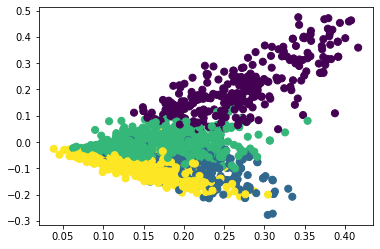

In [17]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(fr_TDM)
test_e = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
fitted = test_e.fit(transformed_weights)
predicted_values = test_e.predict(transformed_weights)
sklearn_pca = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(transformed_weights)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')


##### a) Kmeans with Word2Vec

##### a) Kmeans with Bert